In [1]:
# 시각화
import matplotlib.pyplot as plt
# 판다스
import pandas as pd
# 텍스트 출력
import rich
# 시각화
import matplotlib.pyplot as plt
# 자연어 처리
import nltk
# 넘파이
import numpy as np
# 시각화
import seaborn as sns

from nltk import pos_tag

from rich.console import Console
from rich.theme import Theme


In [2]:
# seaborn font 설정
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
# seaborn 색상 설정
sns.set_palette(sns.color_palette(["#FF4631","#FEBA2B","#FF7F2E","#1BB778","#2F5DFB"]))
# 출력 콘솔 색상 설정
console = Console(theme=Theme({'info': 'italic bold #e0c6c3',
                        'warning': 'italic bold #8a2be2',
                        'danger': 'bold #ffafd8'}))
    

In [3]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

In [4]:
train_df.nunique()

id                2834
url_legal          667
license             15
excerpt           2834
target            2834
standard_error    2834
dtype: int64

### Missing Values

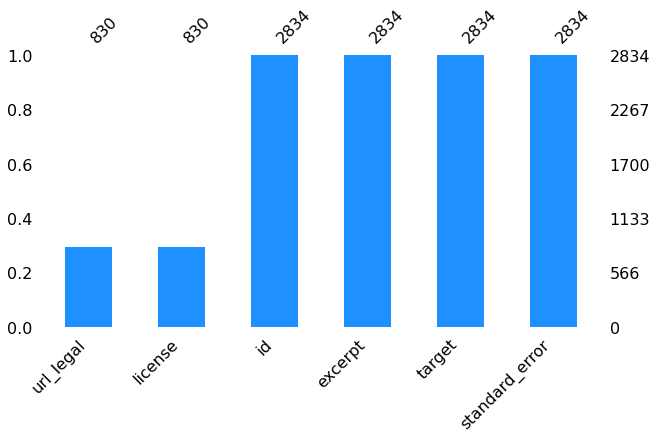

In [5]:
import missingno as msno

msno.bar(train_df, sort='ascending', figsize=(10, 5), color="dodgerblue")
plt.show()

### Distribution

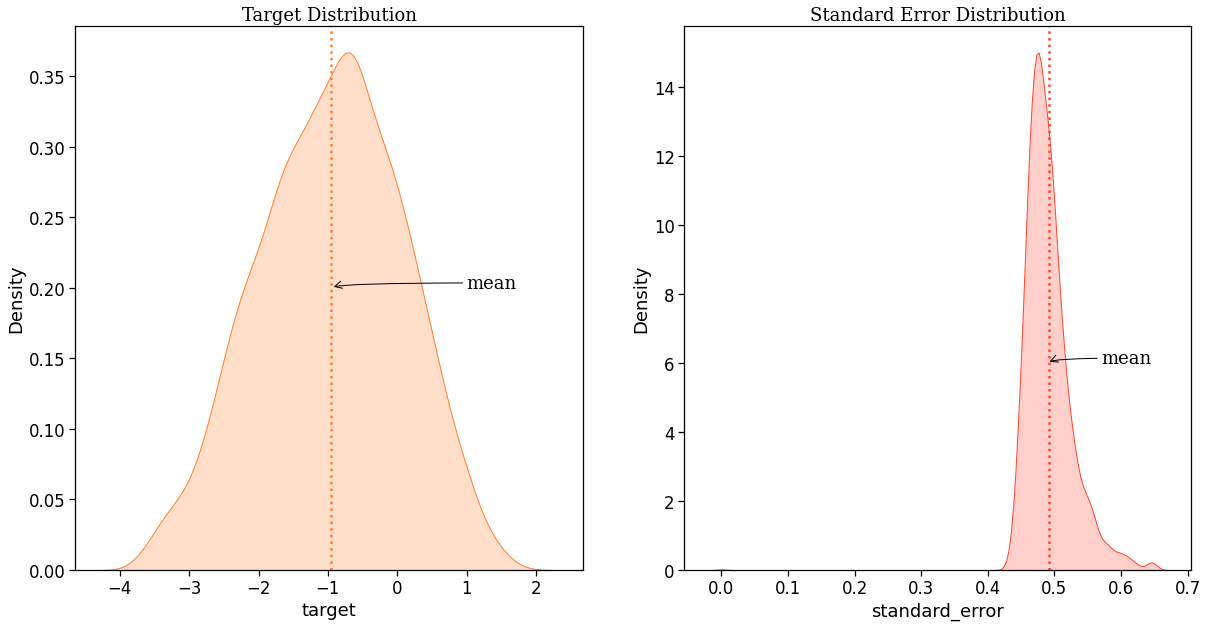

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.kdeplot(train_df['target'], ax=ax[0], shade=True, color='#FF7F2E')
sns.kdeplot(train_df['standard_error'], ax=ax[1], shade=True, color='#FF4631')

# 수직선은 평균으로
ax[0].axvline(train_df['target'].mean(), linestyle=':', color='#FF7F2E')
ax[1].axvline(train_df['standard_error'].mean(), linestyle=':', color='#FF4631')

# 수직선에 대한 주석
ax[0].annotate('mean', xy=(-0.3* np.pi, 0.2), xytext=(1, 0.2), font='Serif',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
ax[1].annotate('mean', xy=(0.49, 6), xytext=(0.57, 6), font='Serif',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax[0].set_title("Target Distribution", font="Serif")
ax[1].set_title("Standard Error Distribution", font="Serif")

plt.show()

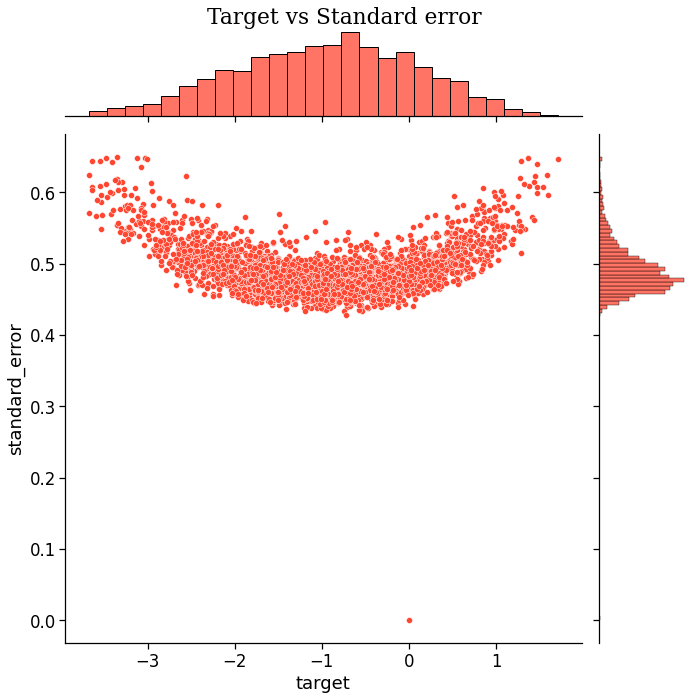

In [7]:
sns.jointplot(x=train_df['target'], y=train_df['standard_error'],height=10)
plt.suptitle("Target vs Standard error ", font="Serif")
plt.subplots_adjust(top=0.95)
plt.show()

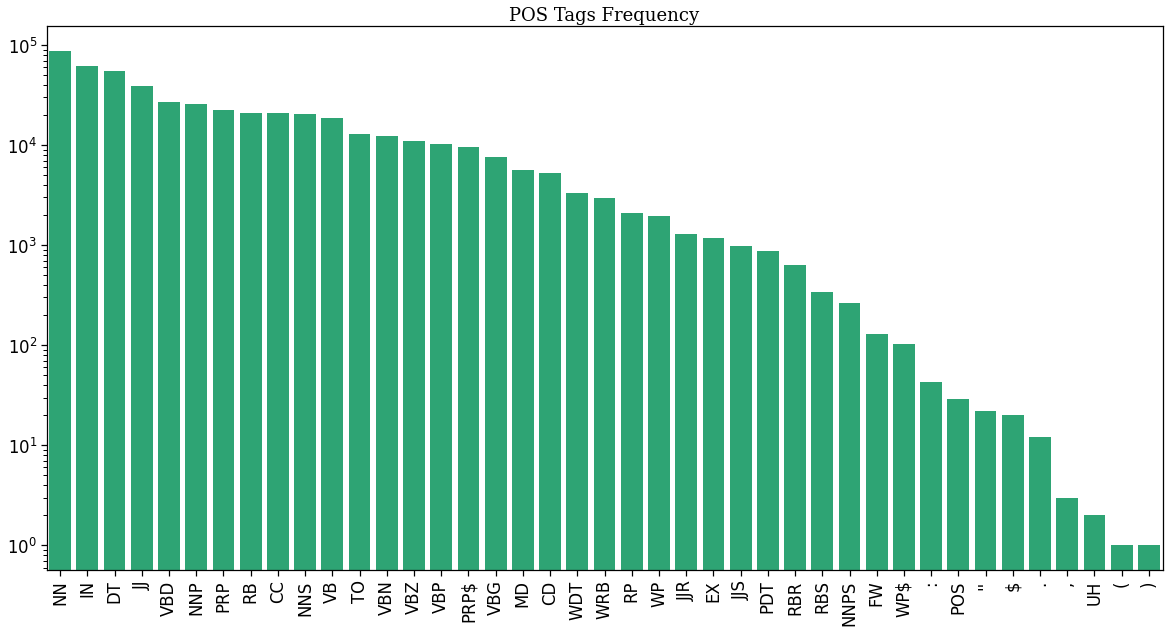

In [8]:
text_props = train_df.copy()

text_props['pos_tags'] = train_df['excerpt'].str.split().map(pos_tag)

def count_tags(pos_tags):
    tag_count = {}

    for word, tag in pos_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return tag_count

text_props['tag_counts'] = text_props['pos_tags'].map(count_tags)

set_pos = set([tag for tags in text_props['tag_counts'] for tag in tags])
tag_cols = list(set_pos)

for tag in tag_cols:
    text_props[tag] = text_props['tag_counts'].map(lambda x: x.get(tag, 0))

pos = text_props[tag_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 10))

ax = sns.barplot(x=pos.index, y=pos.values, color="#1BB778")

ax.set_yscale('log')
plt.xticks(rotation=90)
plt.title("POS Tags Frequency", font="Serif")

plt.show()

### compared to augmented data (back translation)

In [9]:
train_x = train_df['excerpt']

console.print("Before augmentation : ",style="danger")
console.print(train_x[0], style='info')

Before augmentation : 

When the young people returned to the ballroom, it presented a decidedly changed appearance. 
Instead of an interior scene, it was a winter landscape.
The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps 
and hillocks, like a real snow field. The numerous palms and evergreens that had decorated 
the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond 
dust had been lightly sprinkled on them, and glittering crystal icicles hung from the 
branches.
At each end of the room, on the wall, hung a beautiful bear-skin rug.
These rugs were for prizes, one for the girls and one for the boys. And this was the game.
The girls were gathered at one end of the room and the boys at the other, and one end was 
called the North Pole, and the other the South Pole. Each player was given a small flag which
they were to plant on reaching the Pole.
This would have been an easy matter, but each traveller was obliged to wear snowshoes.

In [10]:
aug_df = pd.read_csv('../back_trans_aug/aug_train1.csv')
train_aug = aug_df['aug']

console.print("After augmentation : ", style="danger")
console.print(train_aug[0], style='warning')

After augmentation : 

When young people came back to Ballroom, it was definitely changed. It was a winter landscape
instead of interior scene.
The floor is covered with snow white canvas, but it is not smooth, but it is rumble and 
rumpled in the real eye field. Numerous palms and evergreen, which decorated the room, are 
powdered as flour into flour as a flour. There was a light shiny shiny crystal fault hanging 
lightly on it, and hanging from the branch.
At the end of each room, the beautiful bear skin on the wall is on the wall.
This rug is for a prize, a person for a prize, a girl, for a person for a boy. And this was a
game.
The girls were gathered at one end of the room and gathered at the end of the other, and one 
end called the Arctic, another Antarctica. Each player was given a small flag that has been 
planning to reach the pole.
This would have been an easy task, but each traveler was obliged to wear snow shoe.

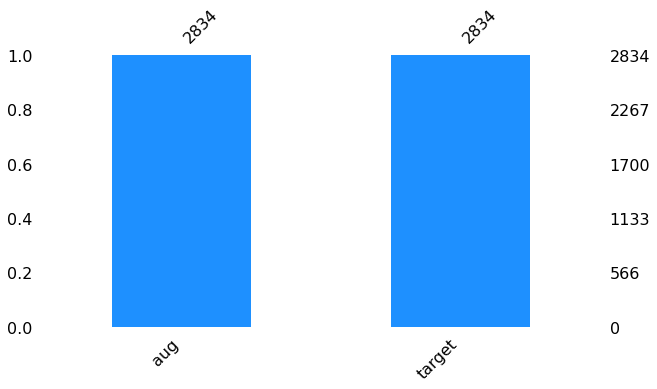

In [11]:
import missingno as msno

msno.bar(aug_df, sort='ascending', figsize=(10, 5), color="dodgerblue")
plt.show()

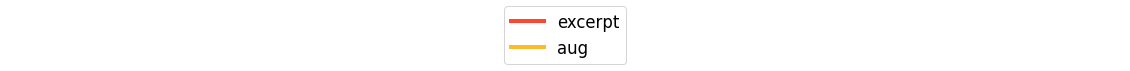

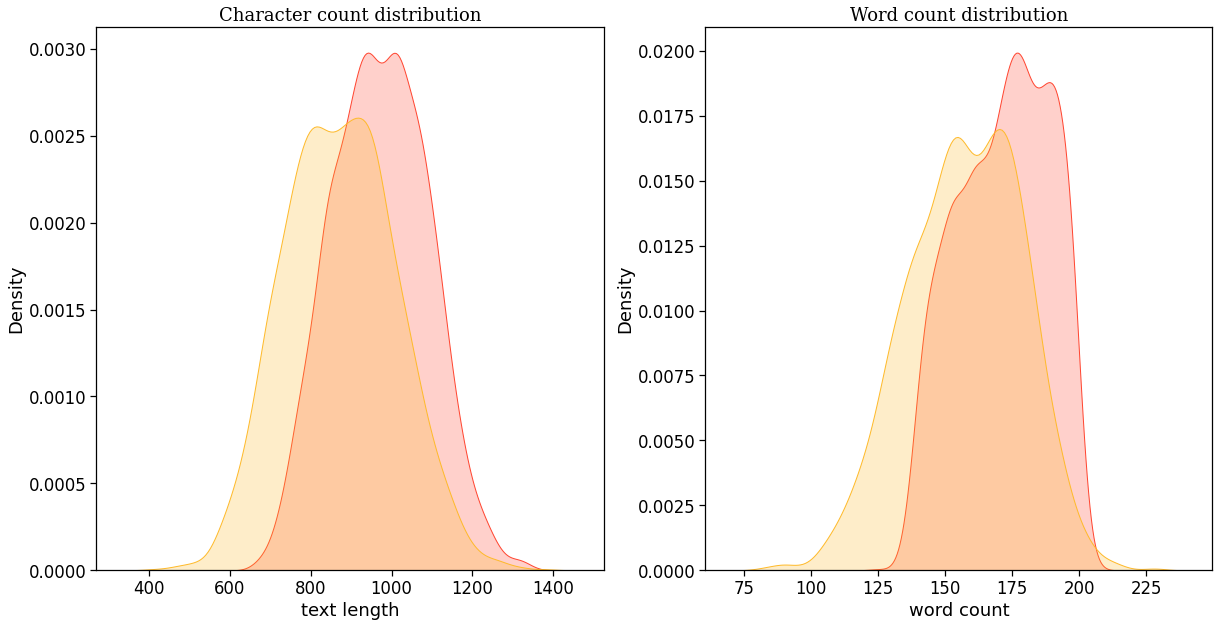

In [12]:
text_len = train_df['excerpt'].str.len()
aug_len = aug_df['aug'].str.len()

train_wordCnt = train_df['excerpt'].apply(lambda x : len(x.split(' ')))
aug_wordCnt = aug_df['aug'].apply(lambda x : len(x.split(' ')))

plt.figure(figsize=(20, 1))
plt.legend([plt.Line2D([0], [0], color='#FF4631',lw=4), plt.Line2D([0], [0], color='#FEBA2B', lw=4)], ['excerpt', 'aug'], loc='center')
plt.axis('off')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.kdeplot(text_len, shade=True, ax=ax[0])
sns.kdeplot(aug_len, shade=True, ax=ax[0])

ax[0].set_title("Character count distribution", font="Serif")
ax[0].set_xlabel("text length")

sns.kdeplot(train_wordCnt, shade=True, ax=ax[1])
sns.kdeplot(aug_wordCnt, shade=True, ax=ax[1])

ax[1].set_title("Word count distribution", font="Serif")
ax[1].set_xlabel("word count")

plt.show()

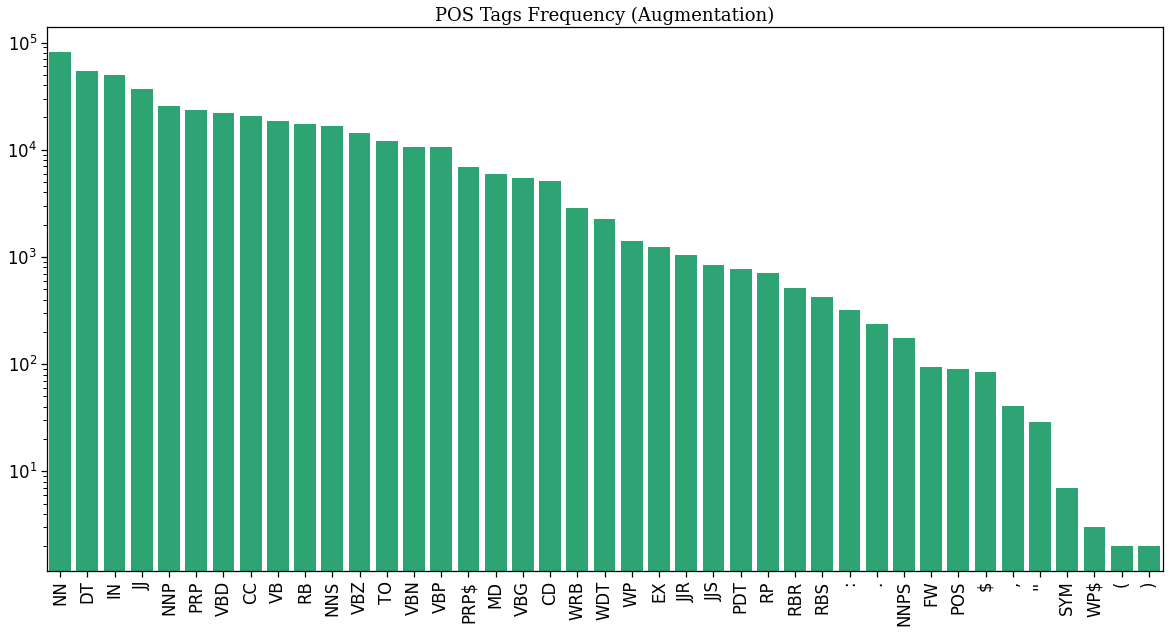

In [13]:
aug_text_props = aug_df.copy()

aug_text_props['pos_tags'] = aug_df['aug'].str.split().map(pos_tag)

def count_tags(pos_tags):
    tag_count = {}

    for word, tag in pos_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return tag_count

aug_text_props['tag_counts'] = aug_text_props['pos_tags'].map(count_tags)

set_pos = set([tag for tags in aug_text_props['tag_counts'] for tag in tags])
tag_cols = list(set_pos)

for tag in tag_cols:
    aug_text_props[tag] = aug_text_props['tag_counts'].map(lambda x: x.get(tag, 0))

aug_pos = aug_text_props[tag_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 10))

ax = sns.barplot(x=aug_pos.index, y=aug_pos.values, color="#1BB778")

ax.set_yscale('log')
plt.xticks(rotation=90)
plt.title("POS Tags Frequency (Augmentation)", font="Serif")

plt.show()